# <span style="color:red"> NUMERICAL EXERCISES 04 <span style="color:red">

## <span style="color:blue">Exercise 04.1 <span style="color:red">

It is just an integration into the C++ code of the molecular dynamics (MD)

## <span style="color:blue">Exercise 04.2 <span style="color:red">

###### MD SIMULATION OF LJ MODEL OF ARGON, 108 MOLECULES ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu)

Objective: Estimation of total (internal) energy per particle ($E/N$), potential energy per particle ($U/N$), kinetic energy per particle ($K/N$), temperature ($T$), and pressure ($P$), in reduced units, in three conditions:

1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

###### EQUILIBRATION

The system of 108 argon molecules is started with certain initial condition: molecules arranged on a 3D fcc lattice, at a certain temperature (related to the mean square velocity).

However, it is not obvious a priori that such a lattice is a configuration conducive to equilibrium for the three cases to be studied; on the contrary, it is very likely that the chosen initial conditions (configuration, temperature) are so far from equilibrium that the required conditions for the system are not achievable (example of typical situation: you fix the fcc lattice and the temperature to be reached, but this temperature is too high for that lattice, so the molecules tend to splash away immediately: the initial lattice and the initial temperature information will soon be lost, and the value of the temperature will change uncontrollably in search of an equilibrium configuration...).

There are therefore two problems:   
1) How quickly is equilibrium found? \
2) Having fixed the fcc lattice, at what temperature must I start the system so that the temperature reached at equilibrium is the right temperature for the three cases to be studied?

I answer the two questions by plotting, for various initial temperatures, the values (NOT progressives) of the five quantities as a function of N = 4000 blocks, where each block is reduced to 1 step only, and evaluating by eye:
1) After how long do the values stabilize? \
2) What is the initial temperature value such that the equilibrium temperature is what I want?

_SOLID (requirement: $T=0.8$)_ \
I start with $T_{start}=0.8$ and reach at equilibrium $T=0.4$ (after < 1000 moves on the 4000 plotted).
I try with $T_{start}=1.0$ and reach $T=0.5$.
I find that the initial configuration is such that approximately the equilibrium temperature is half of the initial temperature.
Then I choose to simulate successively with $T_{start}=1.4, 1.5, 1.6, 1.7, 1.8$.
I eventually add $T_{start}=1.55$, which seems to be the one that stabilizes the most, and which I will choose as the starting temperature. I will check in the next scope if the equilibration time of around 1000 steps is good also for the other quantities.

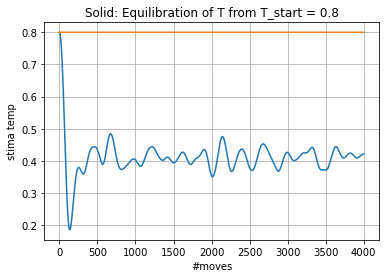

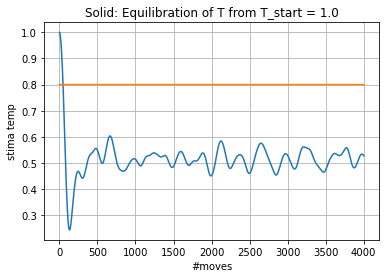

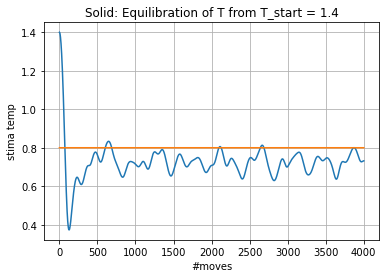

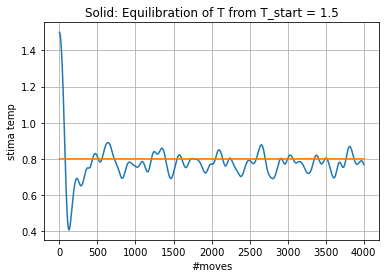

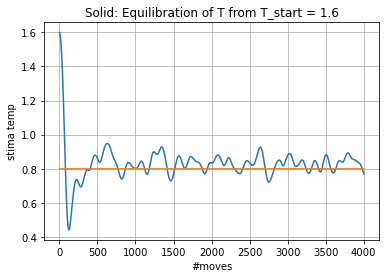

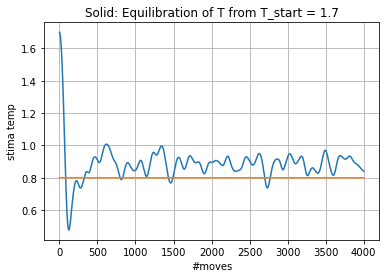

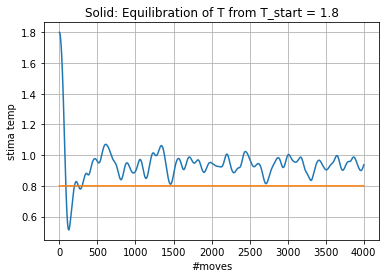

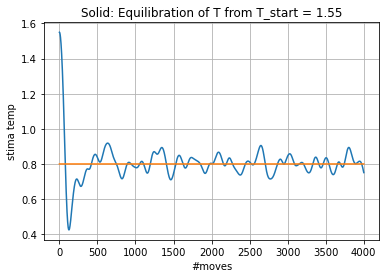

In [1]:
# Only temperature plot

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

T = 0.8
T_start=[0.8, 1.0 , 1.4 , 1.5 , 1.6, 1.7, 1.8, 1.55]
z = np.ones(4000)*T

n, stima_temp, a, d = np.loadtxt("data/solid/eq_temp_solid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
for i in range(8): 
    x = n[4000*i:4000+4000*i]
    y = stima_temp[4000*i:4000+4000*i]
    plt.figure()
    plt.plot(x,y)
    plt.plot(x,z)
    plt.xlabel('#moves')
    plt.ylabel('stima temp')
    plt.title('Solid: Equilibration of T from T_start = ' + str(T_start[i]))
    plt.grid(True)

plt.show()

At the chosen starting temperature ($T_{start}=1.55$) I plot the other four quantities to more confidently estimate the equilibration time.\
By eye it seems that after 2000 moves the system is in equilibrium. I can for safety wait for 4000 moves and start the simulation.


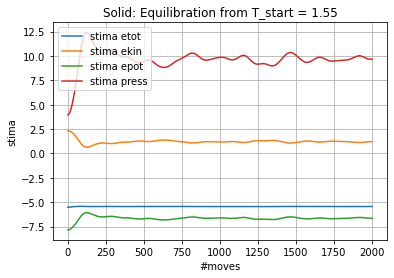

In [2]:
# Plot of the other quantities for T=1.55

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

n, stima_temp, a, d = np.loadtxt("data/solid/eq_etot_solid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
x = n[:2000]
y = stima_temp[:2000]
plt.plot(x,y, label='stima etot')

n, stima_temp, a, d = np.loadtxt("data/solid/eq_ekin_solid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
x = n[:2000]
y = stima_temp[:2000]
plt.plot(x,y, label='stima ekin')

n, stima_temp, a, d = np.loadtxt("data/solid/eq_epot_solid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
x = n[:2000]
y = stima_temp[:2000]
plt.plot(x,y, label='stima epot')

n, stima_temp, a, d = np.loadtxt("data/solid/eq_press_solid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
x = n[:2000]
y = stima_temp[:2000]
plt.plot(x,y, label='stima press')

plt.xlabel('#moves')
plt.ylabel('stima')
plt.title('Solid: Equilibration from T_start = 1.55')
plt.legend()
plt.grid(True)

plt.show()

_LIQUID (requirement: $T=1.1$)_ \
I start with $T_{start}=1.1$ and reach equilibrium $T=0.55$ (after < 1000 moves on the 4000 plotted). The trend is still to halve.
I try $T_{start}=2.0$ and reach $T=1.1$, which is already good.
Then I try $T_{start}=1.9, 2.1, 1.95, 2.05$.
The initial temperature that at equilibrium settles best at $1.1$ is, from the graphs, $T_{start}=2.0$.

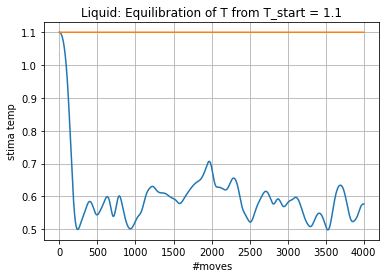

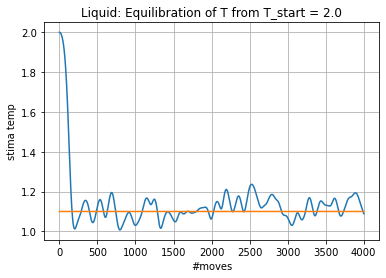

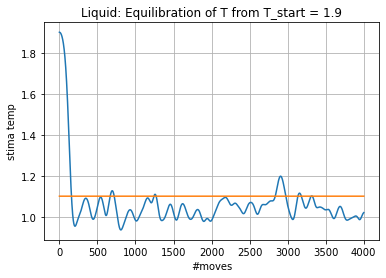

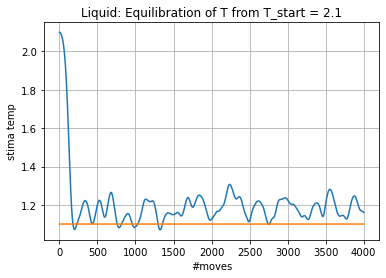

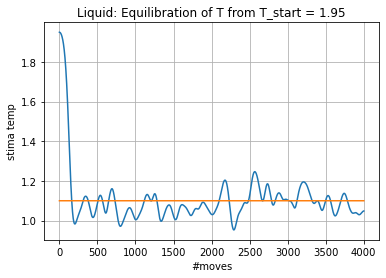

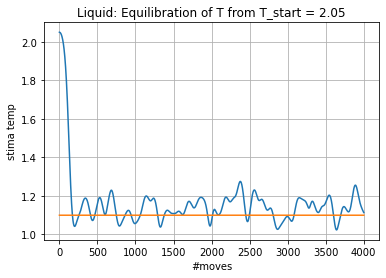

In [3]:
# Only temperature plot

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

T=1.1
T_start=[1.1, 2.0 , 1.9 , 2.1 , 1.95, 2.05]
z = np.ones(4000)*T

n, stima_temp, a, d = np.loadtxt("data/liquid/eq_temp_liquid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
for i in range(6): 
    x = n[4000*i:4000+4000*i]
    y = stima_temp[4000*i:4000+4000*i]
    plt.figure()
    plt.plot(x,y)
    plt.plot(x,z)
    plt.xlabel('#moves')
    plt.ylabel('stima temp')
    plt.title('Liquid: Equilibration of T from T_start = ' + str(T_start[i]))
    plt.grid(True)

plt.show()

At the chosen starting temperature ($T_{start}=2.0$) I plot the other four quantities to more confidently estimate the equilibration time.\
By eye it seems that after 2000 moves the system is in equilibrium. I can for safety wait for 4000 moves and start the simulation.

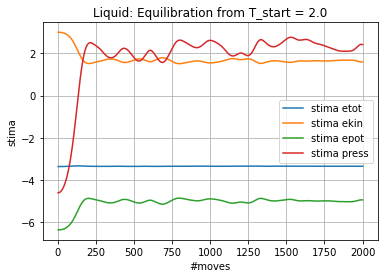

In [4]:
# Plot of the other quantities for T=2.0

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

n, stima_temp, a, d = np.loadtxt("data/liquid/eq_etot_liquid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
x = n[:2000]
y = stima_temp[:2000]
plt.plot(x,y, label='stima etot')

n, stima_temp, a, d = np.loadtxt("data/liquid/eq_ekin_liquid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
x = n[:2000]
y = stima_temp[:2000]
plt.plot(x,y, label='stima ekin')

n, stima_temp, a, d = np.loadtxt("data/liquid/eq_epot_liquid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
x = n[:2000]
y = stima_temp[:2000]
plt.plot(x,y, label='stima epot')

n, stima_temp, a, d = np.loadtxt("data/liquid/eq_press_liquid.dat", usecols =(0, 1, 2, 3), unpack = 'true')
x = n[:2000]
y = stima_temp[:2000]
plt.plot(x,y, label='stima press')

plt.xlabel('#moves')
plt.ylabel('stima')
plt.title('Liquid: Equilibration from T_start = 2.0')
plt.legend()
plt.grid(True)

plt.show()

_GAS (requirement: $T=1.2$)_ \
I start with $T_{start}=1.2$ and reach equilibrium $T=1.4$ (after more moves than the case of solid/liquid, but anyway <4000. Here I simulated twice as many steps because the equilibration time is longer). Here the trend changes and the temperature grows up.
I try $T_{start}=1.0$ and reach $T=1.2$, which is already good.
Then I try $T_{start}=0.95, 1.05$.
The initial temperature that at equilibrium settles best at $1.2$ is, from the graphs, $T_{start}=1.0$.

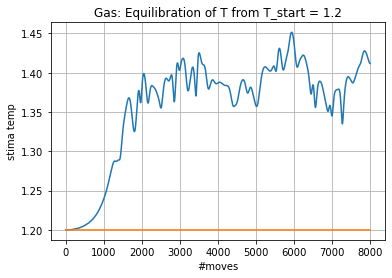

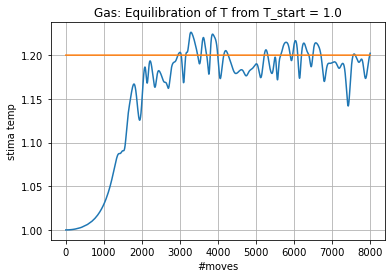

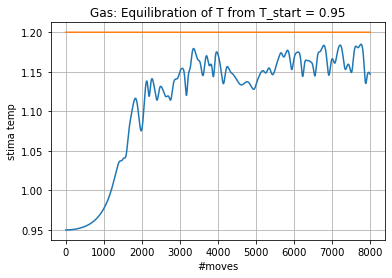

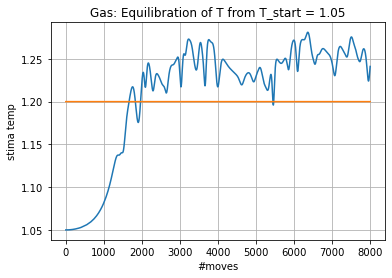

In [5]:
# Only temperature plot

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

T=1.2
T_start=[1.2, 1.0 , 0.95 , 1.05]
z=np.ones(8000)*T
n, stima_temp, a, d = np.loadtxt("data/gas/eq_temp_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
for i in range(4): 
    x = n[8000*i:8000+8000*i]
    y = stima_temp[8000*i:8000+8000*i]
    plt.figure()
    plt.plot(x,y)
    plt.plot(x,z)
    plt.xlabel('#moves')
    plt.ylabel('stima temp')
    plt.title('Gas: Equilibration of T from T_start = ' + str(T_start[i]))
    plt.grid(True)

plt.show()

At the chosen starting temperature ($T_{start}=2.0$) I plot the other four quantities to more confidently estimate the equilibration time.\
By eye it seems that after 4000 moves the system is in equilibrium. I can for safety wait for 8000 moves and start the simulation (twice as much as before).

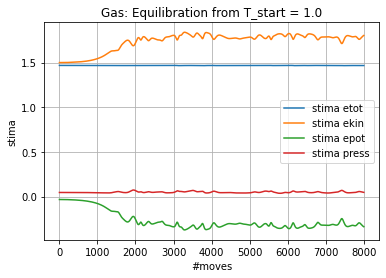

In [6]:
# Plot of the other quantities for T_start=1.0

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y, null1, null2 = np.loadtxt("data/gas/eq_etot_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.plot(x,y, label='stima etot')

x, y, null1, null2 = np.loadtxt("data/gas/eq_ekin_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.plot(x,y, label='stima ekin')

x, y, null1, null2 = np.loadtxt("data/gas/eq_epot_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.plot(x,y, label='stima epot')

x, y, null1, null2 = np.loadtxt("data/gas/eq_press_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.plot(x,y, label='stima press')

plt.xlabel('#moves')
plt.ylabel('stima')
plt.title('Gas: Equilibration from T_start = 1.0')
plt.legend()
plt.grid(True)

plt.show()

<span style="color:red"> 
3. GAS: A-POSTERIORI RE-EQUILIBRATION 
    
I realized, once the simulation was finished and measurements were taken, that the temperature of the gas at the end of the simulation deviated a lot (by about 0.05) from the temperature at the end of equilibration (for liquid and gas, on the contrary, once the equilibration was finished, the temperature remained constant (within 0.01) during the measurements). \
Therefore, I came to the conclusion that gas takes longer to reach equilibrium, and I increased the steps from 8,000 to 60,000. The graphs below represent the equilibration for temperature for the values of $T_{start}=1.0$ and $T_{start}=0.95$. It can be seen that the previous choice of $T_{start}=1.0$ made is less accurate than $T_{start}=0.95$. I now choose $T_{start}=0.95$ and enter text boxes in red in which I correct the previous choice.\
From the graph below: equilibration time = 60,000 moves.

</span>


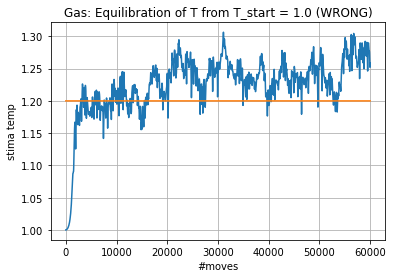

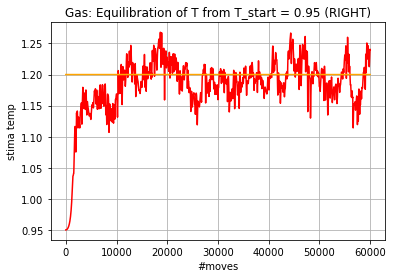

In [7]:
# Only temperature plot

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

T = 1.2

#from 1.0

x, y, null1, null2 = np.loadtxt("data/gas/prova.dat", usecols =(0, 1, 2, 3), unpack = 'true')
x=np.arange(np.size(x))
z=np.ones(np.size(x))*T

plt.plot(x,y)
plt.plot(x,z)
plt.xlabel('#moves')
plt.ylabel('stima temp')
plt.title('Gas: Equilibration of T from T_start = 1.0 (WRONG)')
plt.grid(True)

#from 0.95

plt.figure()
x, y, null1, null2 = np.loadtxt("data/gas/re_eq_temp_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
x=np.arange(np.size(x))
z=np.ones(np.size(x))*T
plt.plot(x,y, color = 'red')
plt.plot(x,z, color = 'orange')
plt.xlabel('#moves')
plt.ylabel('stima temp')
plt.title('Gas: Equilibration of T from T_start = 0.95 (RIGHT)')
plt.grid(True)

plt.show()

<span style="color:red"> 
At the chosen starting temperature ($T_{start}=0.95$) I plot the other four quantities to more confidently estimate the equilibration time.
By eye it seems that after 60,000 moves the system is in equilibrium. 
</span> 

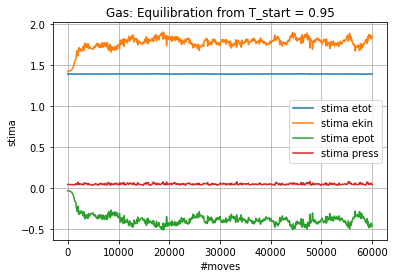

In [8]:
# Plot of the other quantities for T_start=0.95

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y, null1, null2 = np.loadtxt("data/gas/re_eq_etot_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.plot(x,y, label='stima etot')

x, y, null1, null2 = np.loadtxt("data/gas/re_eq_ekin_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.plot(x,y, label='stima ekin')

x, y, null1, null2 = np.loadtxt("data/gas/re_eq_epot_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.plot(x,y, label='stima epot')

x, y, null1, null2 = np.loadtxt("data/gas/re_eq_press_gas.dat", usecols =(0, 1, 2, 3), unpack = 'true')
plt.plot(x,y, label='stima press')

plt.xlabel('#moves')
plt.ylabel('stima')
plt.title('Gas: Equilibration from T_start = 0.95')
plt.legend()
plt.grid(True)

plt.show()

###### SIMULATION OF THE MEASUREMENTS

Having finished equilibration, I can finally simulate measurements (of $U/N$, $K/N$, $E/N$, $T$, $p$) on systems that have reached equilibrium.

I recall the results found above:
1. SOLID ($\rho^\star = 1.1$, $T^\star = 0.8$, $r_c = 2.2$): $T_{start} = 1.55$ ; Start simulation after 4000 moves.
2. LIQUID ($\rho^\star = 0.8$, $T^\star = 1.1$, $r_c = 2.5$): $T_{start} = 2.0$; Start simulation after 4000 moves.
3. GAS ($\rho^\star = 0.05$, $T^\star = 1.2$, $r_c = 5.0$): $T_{start} = 1.0$; Start simulation after 8000 moves.

After letting the system run empty for the required moves, I start the simulation. To avoid autocorrelation problems within the block, I increase the steps per block from 1 to 2000, and reduce the number of blocks to N=50.

After that, the measurement of the five quantities under consideration is done using data blocking in the manner discussed in the previous exercises.
The graphs represent the progressive estimates of the five quantities with their respective errors as a function of the number of moves made. 

1. SOLID

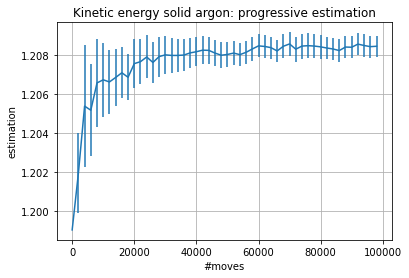

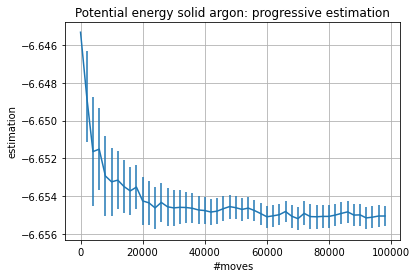

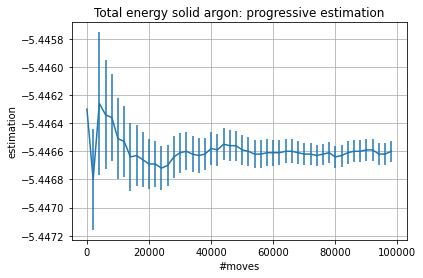

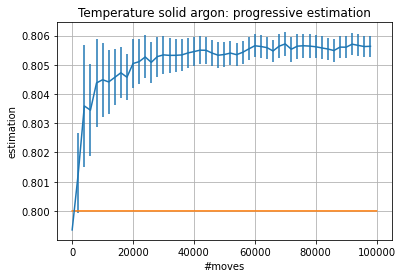

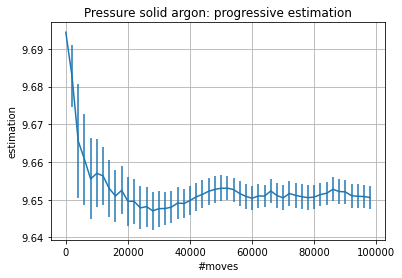

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

T=0.8

M=100000              # Total number of throws
N=50                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)      # [0,1,2,...,N-1]

x*=L # Number of throws = block * (Number of throws in each block) 

sum_prog, err_prog = np.loadtxt("data/solid/output_ekin.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Kinetic energy solid argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/solid/output_epot.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Potential energy solid argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/solid/output_etot.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Total energy solid argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/solid/output_temp.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
x_T=np.arange(M)
z=np.ones(M)*T
plt.plot(x_T,z)
plt.title("Temperature solid argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/solid/output_press.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Pressure solid argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.show()

2. LIQUID

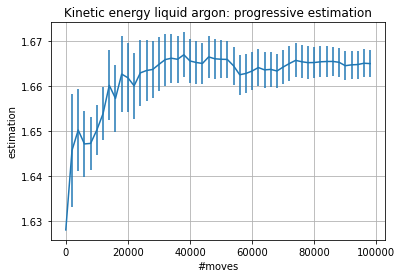

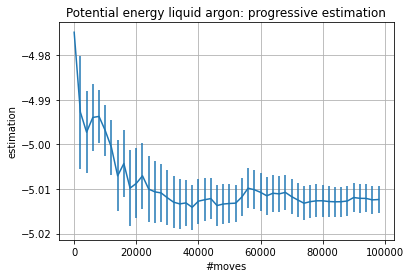

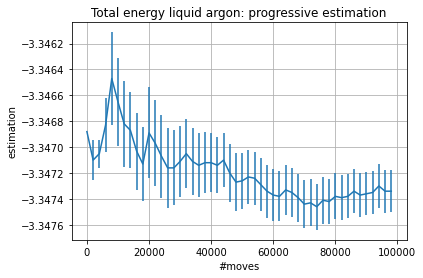

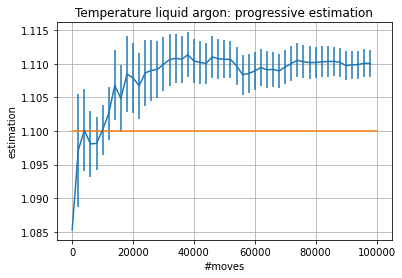

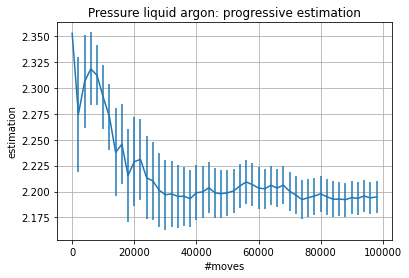

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=100000              # Total number of throws
N=50                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

T = 1.1
x = np.arange(N)      # [0,1,2,...,N-1]

x*=L # Number of throws = block * (Number of throws in each block) 

sum_prog, err_prog = np.loadtxt("data/liquid/output_ekin.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Kinetic energy liquid argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/liquid/output_epot.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Potential energy liquid argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/liquid/output_etot.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Total energy liquid argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/liquid/output_temp.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
x_T=np.arange(M)
z=np.ones(M)*T
plt.plot(x_T,z)
plt.title("Temperature liquid argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/liquid/output_press.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Pressure liquid argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.show()

3. GAS

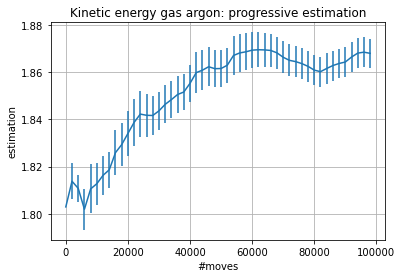

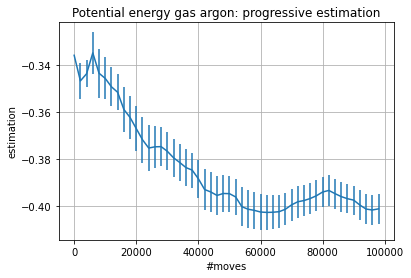

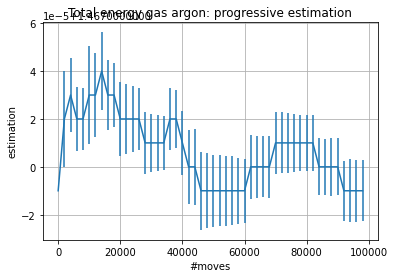

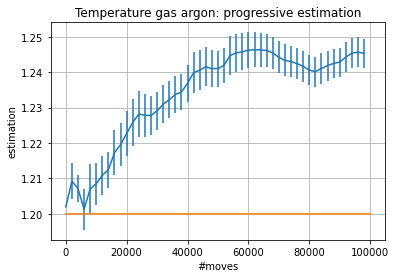

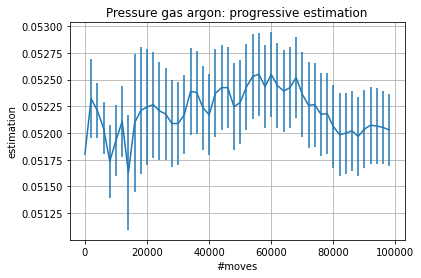

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=100000              # Total number of throws
N=50                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

T=1.2

x = np.arange(N)      # [0,1,2,...,N-1]

x*=L # Number of throws = block * (Number of throws in each block) 

sum_prog, err_prog = np.loadtxt("data/gas/output_ekin.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Kinetic energy gas argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/gas/output_epot.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Potential energy gas argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/gas/output_etot.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Total energy gas argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/gas/output_temp.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Temperature gas argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
x_T=np.arange(M)
z=np.ones(M)*T
plt.plot(x_T,z)
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/gas/output_press.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Pressure gas argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.show()

<span style="color:red">
3.GAS (RE-EQUILIBRATED): $T_{start} = 0.95$, equilibration after 60,000 moves. 
    
Here the final temperature after the simulation remain near the right value of 1.2.   
</span> 

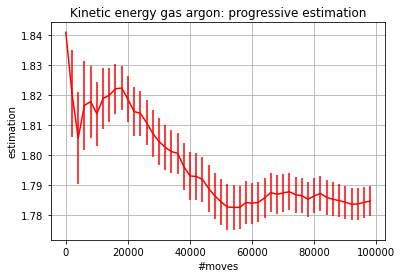

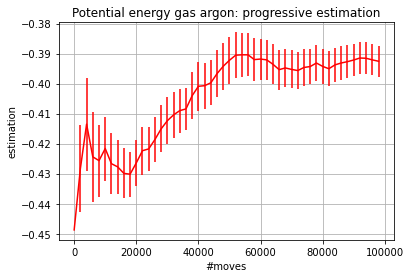

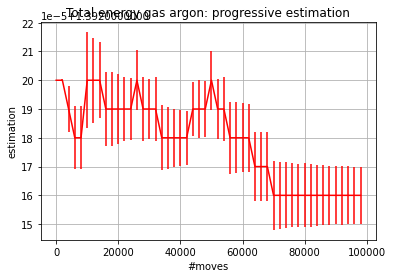

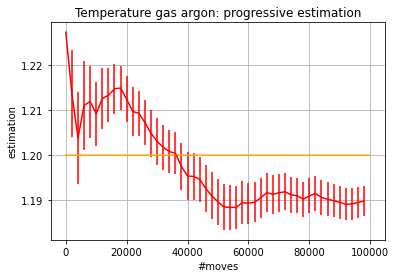

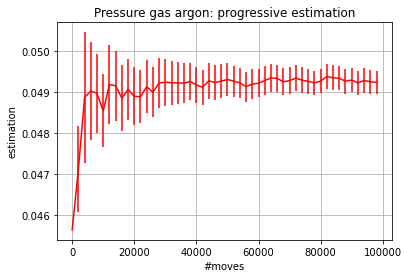

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=100000              # Total number of throws
N=50                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

T=1.2

x = np.arange(N)      # [0,1,2,...,N-1]

x*=L # Number of throws = block * (Number of throws in each block) 

sum_prog, err_prog = np.loadtxt("data/gas/re_output_ekin.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, color='red')
plt.title("Kinetic energy gas argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/gas/re_output_epot.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, color='red')
plt.title("Potential energy gas argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/gas/re_output_etot.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, color='red')
plt.title("Total energy gas argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/gas/re_output_temp.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, color='red')
plt.title("Temperature gas argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
x_T=np.arange(M)
z=np.ones(M)*T
plt.plot(x_T,z, color = 'orange')
plt.grid(True)

plt.figure()
sum_prog, err_prog = np.loadtxt("data/gas/re_output_press.dat", usecols =(2,3), unpack = 'true')
plt.errorbar(x,sum_prog,yerr=err_prog, color='red')
plt.title("Pressure gas argon: progressive estimation")
plt.xlabel('#moves')
plt.ylabel('estimation')
plt.grid(True)

plt.show()

###### CONCLUSIONS

1) The correction made for gas equilibration leads to better results. This means that gas needs a much longer equilibration time than solid and liquid, and which is not surprising because we start from a crystal configuration, which is not typical for gas.

2) It is not a contradiction that after the simulations the temperature of the system is not compatible within the standard deviation with the required temperature, in fact the temperature that one would like to reach is not a datum entered into the problem, but a goal that one tries to reach by equilibration. The standard deviation therefore does not express a change from that value, but expresses the uncertainty about the temperature achieved by the system, given the initial conditions. \
In other words: the goal of the equilibration was to arrive at some good neighborhood of the required temperature (around 0.1).

3) The plot for the total energy in the gas has clear rounding errors. You would need to have everything rounded up by adding a significant digit in the cout in the cplusplus code.
